In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Political-media-DFE.csv')

# Display the first few rows of the dataset
print(df.head())

# Display basic information about the dataset
print(df.info())


   index   _unit_id  _golden _unit_state  _trusted_judgments  \
0      0  766192484    False   finalized                   1   
1      1  766192485    False   finalized                   1   
2      2  766192486    False   finalized                   1   
3      3  766192487    False   finalized                   1   
4      4  766192488    False   finalized                   1   

  _last_judgment_at  audience  audience:confidence      bias  bias:confidence  \
0      8/4/15 21:17  national                  1.0  partisan              1.0   
1      8/4/15 21:20  national                  1.0  partisan              1.0   
2      8/4/15 21:14  national                  1.0   neutral              1.0   
3      8/4/15 21:08  national                  1.0   neutral              1.0   
4      8/4/15 21:26  national                  1.0  partisan              1.0   

   ... orig__golden  audience_gold  bias_gold    bioid  \
0  ...          NaN            NaN        NaN  R000596   
1  ...      

In [ ]:

print(df.isnull().sum())

# Display summary statistics
print(df.describe(include='all'))

index                     0
_unit_id                  0
_golden                   0
_unit_state               0
_trusted_judgments        0
_last_judgment_at         0
audience                  0
audience:confidence       0
bias                      0
bias:confidence           0
message                   0
message:confidence        0
orig__golden           5000
audience_gold          5000
bias_gold              5000
bioid                     0
embed                     0
id                        0
label                     0
message_gold           5000
source                    0
text                      0
dtype: int64
              index      _unit_id _golden _unit_state  _trusted_judgments  \
count   5000.000000  5.000000e+03    5000        5000          5000.00000   
unique          NaN           NaN       1           1                 NaN   
top             NaN           NaN   False   finalized                 NaN   
freq            NaN           NaN    5000        5000          

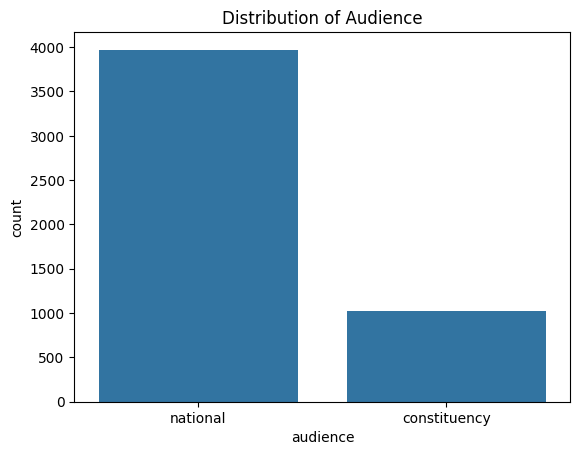

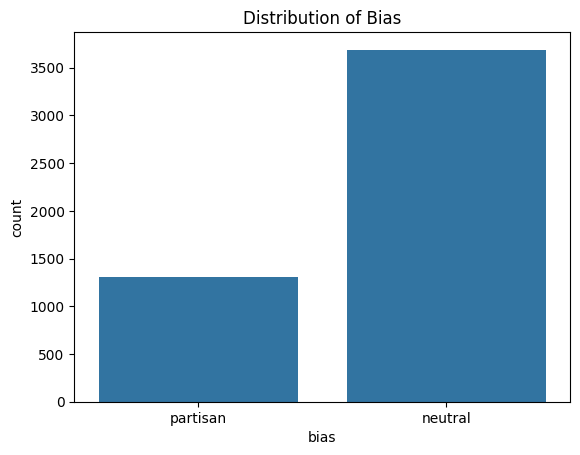

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Audience
sns.countplot(x='audience', data=df)
plt.title('Distribution of Audience')
plt.show()

# Distribution of Bias
sns.countplot(x='bias', data=df)
plt.title('Distribution of Bias')
plt.show()


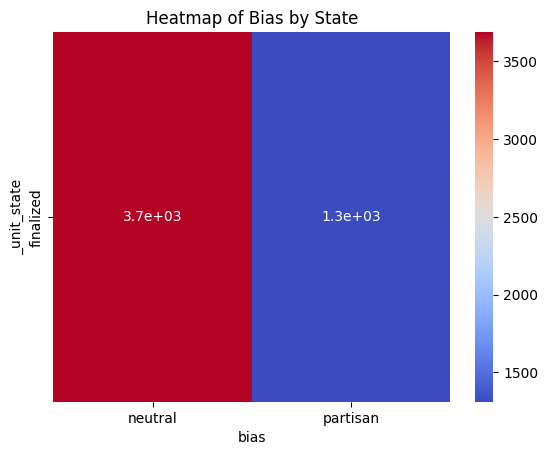

In [8]:
# Heat map of bias by state
state_bias = pd.crosstab(df['_unit_state'], df['bias'])
sns.heatmap(state_bias, annot=True, cmap='coolwarm')
plt.title('Heatmap of Bias by State')
plt.show()


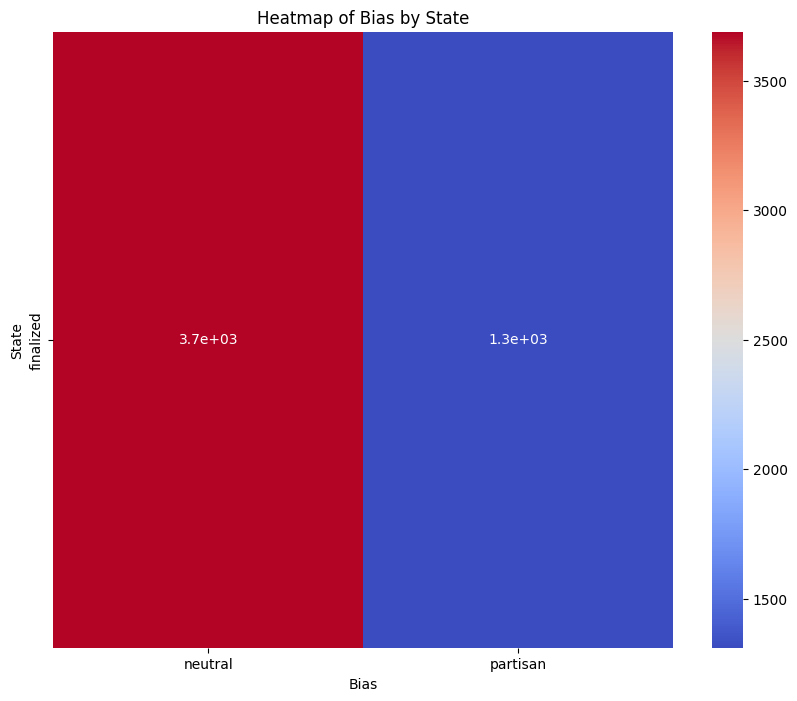

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and it's already loaded and cleaned
# Create a pivot table for state vs bias
pivot_table = pd.crosstab(df['_unit_state'], df['bias'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Heatmap of Bias by State')
plt.xlabel('Bias')
plt.ylabel('State')
plt.show()


In [ ]:
print(df['_last_judgment_at'].head())

0   2015-08-04 21:17:00
1   2015-08-04 21:20:00
2   2015-08-04 21:14:00
3   2015-08-04 21:08:00
4   2015-08-04 21:26:00
Name: _last_judgment_at, dtype: datetime64[ns]


In [ ]:
# Convert _last_judgment_at to datetime with specified format
df['_last_judgment_at'] = pd.to_datetime(df['_last_judgment_at'], format='%Y-%m-%d')


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Preprocess text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(X)

# Display the top words for each topic
words = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f'Topic {i}:')
    print([words[i] for i in topic.argsort()[-10:]])


Topic 0:
['amp', 'great', 'house', 'act', 'president', 'jobs', 'new', 'ûªs', 'today', 'http']
Topic 1:
['happy', 'great', 'tune', 'ûªs', 'morning', 'obama', 'irs', 'amp', 'today', 'http']
Topic 2:
['state', 'great', 'veterans', 'congressional', 'obamacare', 'amp', 'ûªs', 'today', 'service', 'http']
Topic 3:
['com', 'www', 'today', 'government', 'obamacare', 'senate', 'gov', 'veterans', 'house', 'http']
Topic 4:
['care', 'act', 'women', 'day', 'president', 'health', 'great', 'today', 'ûªs', 'http']


In [11]:
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Function to clean text data
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"ûªs", "'s", text)    # Fix encoding issue
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    return text

# Apply cleaning function to text data
df['cleaned_text'] = df['text'].apply(clean_text)

# Preprocess cleaned text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['cleaned_text'])

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(X)

# Display the top words for each topic
words = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f'Topic {i}:')
    print([words[i] for i in topic.argsort()[-10:]])


Topic 0:
['family', 'day', 'community', 'pm', 'tune', 'national', 'time', 'great', 'amp', 'today']
Topic 1:
['service', 'day', 'new', 'high', 'rt', 'th', 'school', 'congressional', 'veterans', 'great']
Topic 2:
['people', 'week', 'help', 'office', 'veterans', 'new', 'service', 'day', 'health', 'today']
Topic 3:
['house', 'amp', 'health', 'tax', 'state', 'act', 'jobs', 'energy', 'president', 'today']
Topic 4:
['people', 'americans', 'jobs', 'amp', 'act', 'congress', 'work', 'today', 'obamacare', 'house']


Unique years in the dataset: [2015]


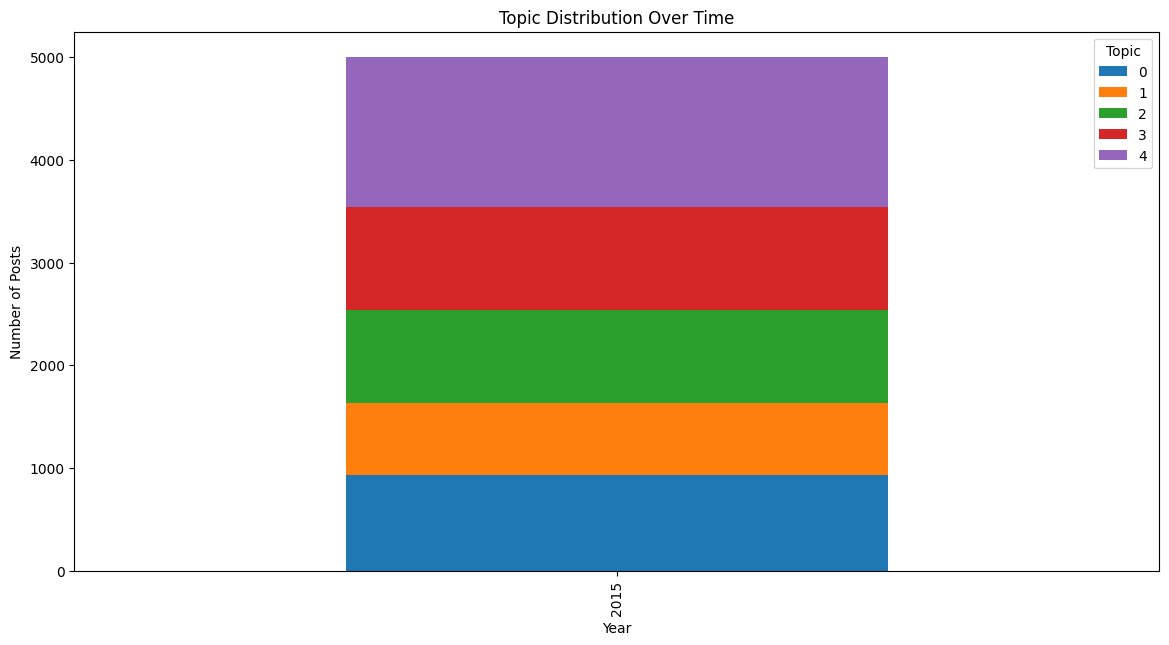

In [ ]:
# Check unique years in the date column
df['year'] = df.index.year
unique_years = df['year'].unique()
print(f'Unique years in the dataset: {unique_years}')

# Plot topic distribution over all years
topic_time = df.groupby(['year', 'topic']).size().unstack().fillna(0)
topic_time.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Topic Distribution Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Posts')
plt.legend(title='Topic')
plt.show()


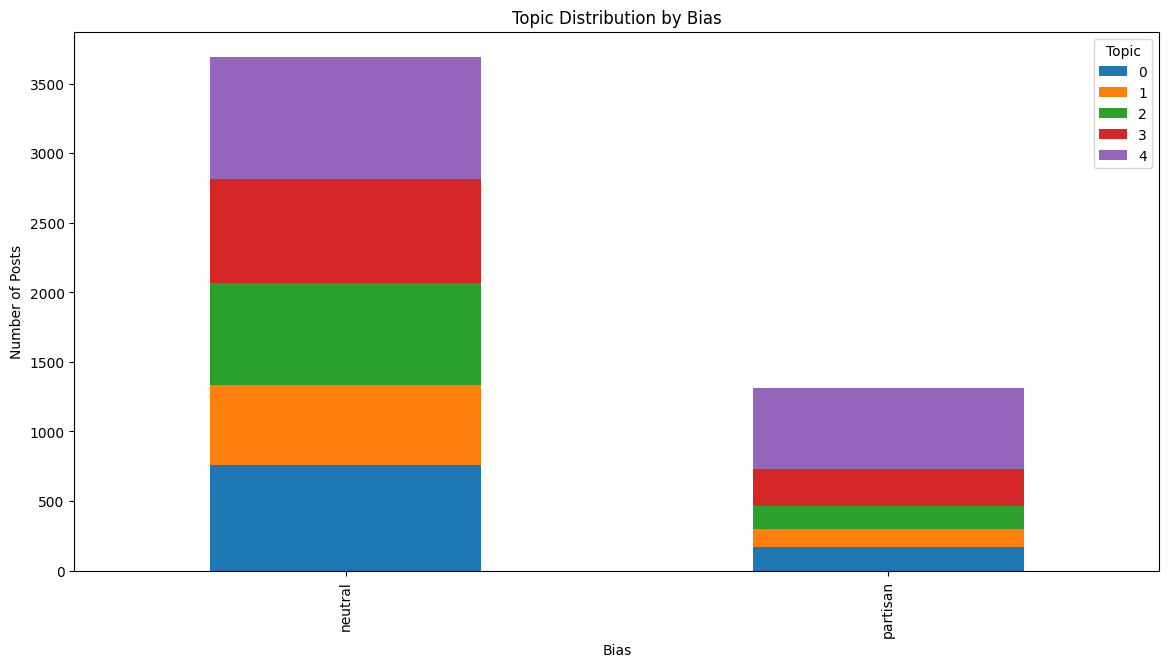

In [ ]:
# Plot topic distribution by bias
topic_bias = pd.crosstab(df['bias'], df['topic'])
topic_bias.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Topic Distribution by Bias')
plt.xlabel('Bias')
plt.ylabel('Number of Posts')
plt.legend(title='Topic')
plt.show()


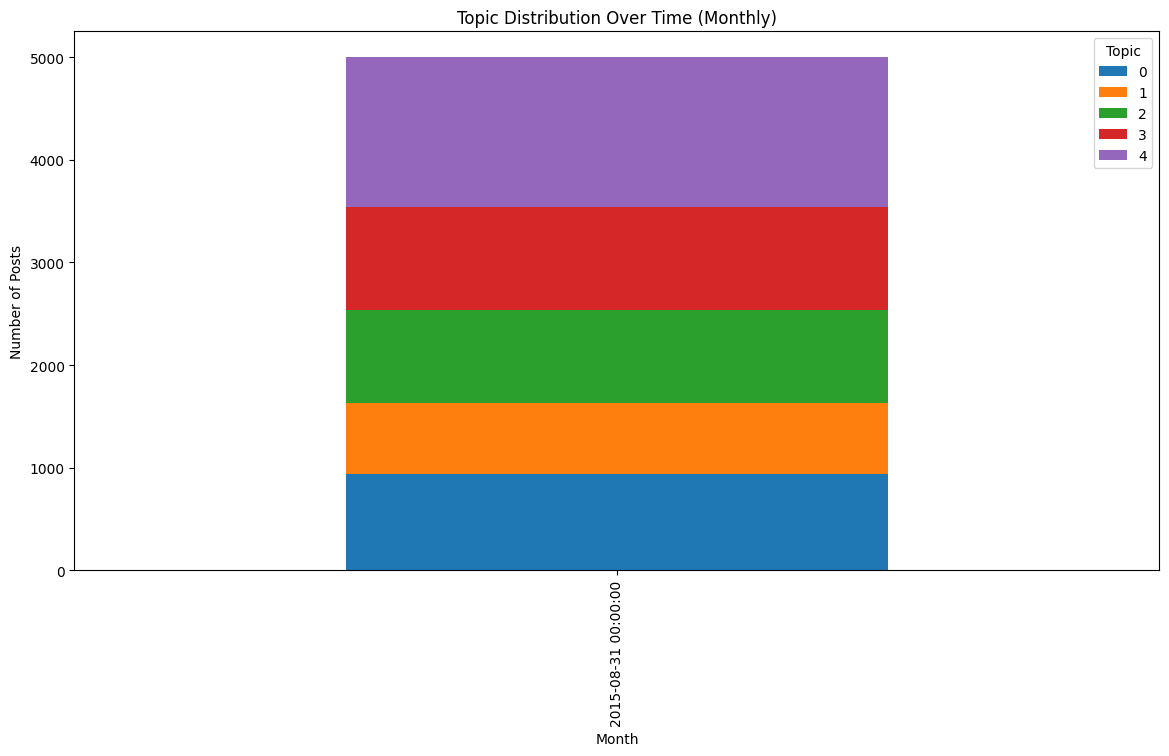

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure '_last_judgment_at' is in datetime format
df['_last_judgment_at'] = pd.to_datetime(df['_last_judgment_at'])

# Assign topics to documents
doc_topic_dist = lda.transform(X)
df['topic'] = np.argmax(doc_topic_dist, axis=1)

# Plot topic distribution over time
df['date'] = pd.to_datetime(df['_last_judgment_at'])
df.set_index('date', inplace=True)

# Aggregate by month
topic_time_month = df.groupby([pd.Grouper(freq='M'), 'topic']).size().unstack().fillna(0)

# Plot with aggregated data by month
topic_time_month.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Topic Distribution Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.legend(title='Topic')
plt.show()


In [6]:
# Check unique dates in the date column
unique_dates = df['_last_judgment_at'].unique()
print(f'Number of unique dates: {len(unique_dates)}')
print(f'Unique dates: {unique_dates[:10]}')  # Print first 10 unique dates for inspection


Number of unique dates: 238
Unique dates: <DatetimeArray>
['2015-08-04 21:17:00', '2015-08-04 21:20:00', '2015-08-04 21:14:00',
 '2015-08-04 21:08:00', '2015-08-04 21:26:00', '2015-08-04 21:06:00',
 '2015-08-04 21:07:00', '2015-08-04 20:51:00', '2015-08-04 20:57:00',
 '2015-08-04 20:35:00']
Length: 10, dtype: datetime64[ns]
